<a href="https://colab.research.google.com/github/JairEsc/Mat_Apl_2/blob/main/NN_medium_base.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [76]:
import matplotlib.pyplot as plt
import tqdm
from time import time

# Estructura de los datos.

Consideramos un caso general, una base con datos de frecuencias de especies, cada observación de dimensión $k$, y supongamos que tenemos $n$ observaciones.

El output busca ser la clasificación en una de $d$ categorías, definidas ya sea por ciudad o localización-clima (pero de un sólo tipo).


# Datos de ejemplo

In [77]:
import pandas as pd
import matplotlib.pyplot as plt

df = pd.read_csv("base.csv")
print(df.head())
from sklearn.utils import shuffle
df = shuffle(df)###El ajuste depende de este shuffle*****

   muestra         0         1         2         3         4         5  \
0        0 -0.017698 -0.018833 -0.005616 -0.000572 -0.005652 -0.018966   
1        1 -0.019763 -0.018925 -0.005570 -0.000452 -0.005316 -0.018045   
2        2 -0.020007 -0.020142 -0.005839 -0.000438 -0.005355 -0.018727   
3        3 -0.014178 -0.015676 -0.005112 -0.000345 -0.005809 -0.019237   
4        4 -0.020483 -0.020830 -0.005978 -0.000489 -0.005396 -0.019325   

          6         7         8  ...       491       492       493       494  \
0 -0.012661 -0.016314 -0.001750  ...  0.000706 -0.001257  0.001123 -0.001063   
1 -0.012203 -0.015462 -0.001681  ...  0.001495  0.000359 -0.000335 -0.000279   
2 -0.012396 -0.015604 -0.001798  ... -0.000068 -0.000303  0.000749 -0.000299   
3 -0.013223 -0.017674 -0.001145  ...  0.000358 -0.000483  0.000012 -0.000220   
4 -0.012630 -0.016130 -0.002057  ... -0.000909  0.000261  0.001696 -0.000984   

        495       496       497       498       499              etiqueta 

In [78]:
print(df.shape)

(3043, 502)


In [79]:
ytags=df['etiqueta']
print(ytags)

1466            Equat-FullH1
2310      Snow-FullH-HotSum2
119      Snow-FullH-CoolSum8
554     Arid-Steppe-HotArid4
747             Equat-FullH5
                ...         
2687      Snow-FullH-HotSum2
2931      Snow-FullH-HotSum2
1461            Equat-FullH1
2441      Snow-FullH-HotSum2
218      Polar-PolarTundra10
Name: etiqueta, Length: 3043, dtype: object


In [80]:
import numpy as np
_,idx = np.unique(ytags,return_inverse=True)
uniques,ocurr=np.unique(idx,return_counts=True)

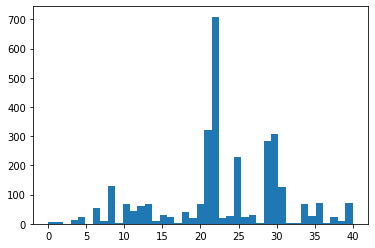

In [81]:
plt.hist(idx,bins=len(_))
plt.show()#Mala representatividad de clases.

# Definición del modelo.

# Partición de datos

In [82]:
from keras.utils import to_categorical
X_total=df.drop(columns=['muestra','etiqueta'])
Y_total=to_categorical(idx)
train_perc=int(0.80*len(X_total))
X_train=X_total[0:train_perc]
Y_train=Y_total[0:train_perc]

In [83]:
k,n=X_train.shape
n=n#-indice, -tag
print(k,n)

2434 500


In [84]:
input_shape = (n,)#=n
output_shape=len(np.unique(ytags))

In [85]:
import tensorflow as tf
import keras
import pandas as pd
from keras import layers
from keras import models

# Capas, neuronas, funciones de activación, loss.

In [86]:
model = models.Sequential()

model.add(layers.InputLayer(input_shape=(n,), name='Input_Layer'))#Obligatoria
model.add(layers.Dense(512, activation='relu'))# Numero de capas ocultas: Opcional
model.add(layers.Dense(64, activation='relu'))# Numero de neuronas en cada capa: Opcional
model.add(layers.Dense(41, activation='Softmax', name='Output_Layer'))#Obligatoria
model.summary()
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])
import time
tic = time.time()

model.fit(x = X_train, 
           y = Y_train, 
          validation_data=[X_total[train_perc:], Y_total[train_perc:]],##Cuando haya otra base, se modifica ese 200
          batch_size=10,
           epochs=20,
           verbose=2,shuffle=True)

print('seconds=', time.time()-tic)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_10 (Dense)            (None, 512)               256512    
                                                                 
 dense_11 (Dense)            (None, 64)                32832     
                                                                 
 Output_Layer (Dense)        (None, 41)                2665      
                                                                 
Total params: 292,009
Trainable params: 292,009
Non-trainable params: 0
_________________________________________________________________
Epoch 1/20
244/244 - 2s - loss: 2.5620 - accuracy: 0.3899 - val_loss: 1.8036 - val_accuracy: 0.6141 - 2s/epoch - 7ms/step
Epoch 2/20
244/244 - 1s - loss: 1.3624 - accuracy: 0.6816 - val_loss: 1.0148 - val_accuracy: 0.7471 - 969ms/epoch - 4ms/step
Epoch 3/20
244/244 - 1s - loss: 0.7762 - accuracy: 0.8426 - val_l

In [148]:
test_predicted_labels_raw = model.predict(X_total[train_perc:])
test_true_labels      = np.argmax(Y_total[train_perc:],axis=1)
test_predicted_labels = np.argmax(test_predicted_labels_raw,axis=1)

20/20 [==============================] - 0s 4ms/step


In [149]:
import matplotlib.pyplot as plt

from sklearn.metrics import accuracy_score,confusion_matrix, precision_score, recall_score,roc_auc_score

from sklearn.metrics import f1_score, cohen_kappa_score
import seaborn as sns 

accuracy = accuracy_score(test_true_labels,test_predicted_labels)
print('Accuracy: %f' % accuracy)
# precision tp / (tp + fp)
precision = precision_score(test_true_labels,test_predicted_labels,average='weighted',zero_division=1)
print('Precision: %f',precision)
# recall: tp / (tp + fn)
recall = recall_score(test_true_labels,test_predicted_labels,average='weighted',zero_division=1)
print('Recall: %f' , recall)
# f1: 2 tp / (2 tp + fp + fn)
f1 = f1_score(test_true_labels,test_predicted_labels,average='weighted')
print('F1 score: %f' % f1)

Accuracy: 0.954023
Precision: %f 0.9618400764429893
Recall: %f 0.9540229885057471
F1 score: 0.950293
